In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rn
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

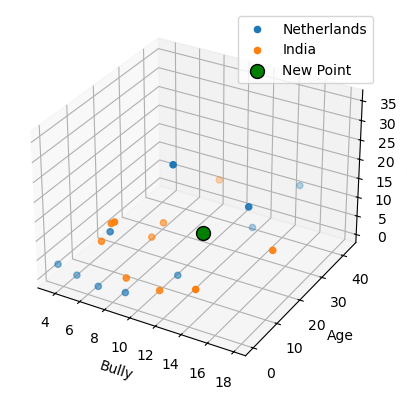

Manual k-NN classification: The new person belongs to India


C:\Users\wangd\AppData\Local\Temp\ipykernel_17724\2941389795.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  netherl.append(math.sqrt(((xrand - nandi.loc[i][0]) ** 2) + ((yrand - nandi.loc[i][1]) ** 2) + ((zrand - nandi.loc[i][2]) ** 2)))
C:\Users\wangd\AppData\Local\Temp\ipykernel_17724\2941389795.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indl.append(math.sqrt(((xrand - nandi.loc[i][3]) ** 2) + ((yrand - nandi.loc[i][4]) ** 2) + ((zrand - nandi.loc[i][5]) ** 2)))


In [107]:
nandi = pd.read_csv('D:/Ismail Lappy/Ismailneww/NMIMS/sem III/Managing Uncertinity/project/nandi.csv')
nandi.dropna(inplace=True)
prob = nandi / 100

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x,y,z = nandi['Nbully'].values,nandi['Nage'].values,nandi['Nsatis'].values
x1,y1,z1 = nandi['Ibully'].values
y1 = nandi['Iage'].values
z1 = nandi['Isatis'].values

ax.scatter3D(x, y, z, label='Netherlands')
ax.scatter3D(x1, y1, z1, label='India')
ax.legend()

#Generating a random point to classify
xrand = rn.uniform(3.6, 17.8)
yrand = rn.uniform(0, 43)
zrand = rn.uniform(0.35, 35.2)

ax.scatter3D([xrand], [yrand], [zrand], color='green', s=100, edgecolor='black', label='New Point')
plt.show()

# Function to calculate distances and classify the new point
def rep(xrand, yrand, zrand):
    netherl = []
    indl = []
    for i in range(10):
        netherl.append(math.sqrt(((xrand - nandi.loc[i][0]) ** 2) + ((yrand - nandi.loc[i][1]) ** 2) + ((zrand - nandi.loc[i][2]) ** 2)))
        indl.append(math.sqrt(((xrand - nandi.loc[i][3]) ** 2) + ((yrand - nandi.loc[i][4]) ** 2) + ((zrand - nandi.loc[i][5]) ** 2)))

    n2, i2 = netherl.copy(), indl.copy()
    netherl.sort()
    indl.sort()

    netherlands_count = 0
    india_count = 0

    for i in range(3):
        if((n2[n2.index(netherl[i])])<(i2[i2.index(indl[i])])):
            print("Netherland",n2[n2.index(netherl[i])]," at index ",n2.index(netherl[i]))
            netherlands_count += 1
        else:
            print("India",i2[i2.index(indl[i])]," at index ",i2.index(indl[i]))
            india_count += 1
    
    if netherlands_count > india_count:
        return "Netherlands"
    else:
        return "India"

manual_classification = rep(xrand, yrand, zrand)
print(f"Manual k-NN classification: The new person belongs to {manual_classification}")

In [89]:
first_part = nandi.iloc[:, :3].copy()
second_part = nandi.iloc[:, 3:].copy()
first_part.columns = second_part.columns = ['bully', 'age', 'satis']
X = pd.concat([first_part, second_part], axis=0).reset_index(drop=True)
y = np.array([0]*10 + [1]*10)  # Assuming first 10 rows are 'Netherlands' and next 10 are 'India'

# Split the data (if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use sklearn k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict using sklearn k-NN
new_point = np.array([[xrand, yrand, zrand]])  # Ensure only 3 features
sklearn_classification = knn.predict(new_point)

# Map the prediction to labels
if sklearn_classification == 0:
    sklearn_classification_label = "Netherlands"
else:
    sklearn_classification_label = "India"

print(f"Sklearn k-NN classification: The new person belongs to {sklearn_classification_label}")

# Compare Results
if manual_classification == sklearn_classification_label:
    print("Both methods classify the new person as belonging to the same country.")
else:
    print("The methods classify the new person differently.")

Sklearn k-NN classification: The new person belongs to India
Both methods classify the new person as belonging to the same country.


c:\Users\wangd\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [76]:
nandi = pd.read_csv('D:/Ismail Lappy/Ismailneww/NMIMS/sem III/Managing Uncertinity/project/nandi.csv')

In [77]:
nandi

,Nbully,Nage,Nsatis,Ibully,Iage,Isatis
0,4.69,2.0,0.35,17.84,13.51,13.51
1,6.86,0.0,0.85,14.52,0.00,8.11
2,9.03,0.0,1.50,11.20,2.70,2.70
3,11.19,10.0,2.30,7.88,16.22,5.41
4,13.00,32.0,4.10,8.30,18.92,8.11
5,14.80,43.0,11.00,8.71,40.54,8.11
6,16.61,10.0,25.20,9.13,0.00,5.41
7,12.27,3.0,35.20,8.30,0.00,18.92
8,7.94,0.0,16.10,7.47,2.70,16.22
9,3.61,0.0,3.30,6.64,2.70,10.81


In [79]:
nandi.dropna(inplace=True)

In [92]:
ax.scatter3D(xrand, yrand, zrand, c='b', marker='x')
plt.show()

In [99]:
xrand = (3.6, 17.8)
yrand = (0, 43)
zrand = (0.35, 35.2)

ax.scatter3D(xrand, yrand, zrand, color='green', s=100, edgecolor='black', label='New Point')
plt.show()

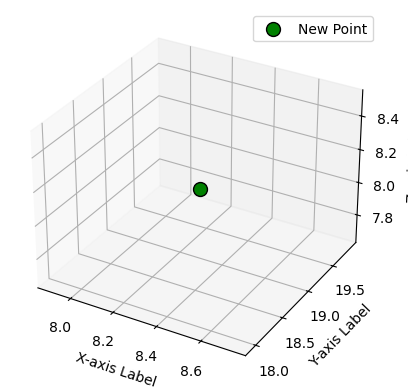

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data for demonstration
xrand = 8.32
yrand = 18.9
zrand = 8.09

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the new point
ax.scatter3D([xrand], [yrand], [zrand], color='green', s=100, edgecolor='black', label='New Point')

# Optional: Add labels and legend for clarity
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_zlabel('Z-axis Label')
ax.legend()

# Show plot
plt.show()
